## Capstone Main Objective:  To see if certain demographics of beneficiaries are more prone to fraud. 
1.  How many frauds?  Answer:  Inpatient= 23,402  Outpatient= 189,394
2. Where they are occuring?
3.  Who are they affecting the most?
4.  How does fraud change over the years? Don't have the data
5. What are the demographics? gender, race, state, chronic health conditions
6. Fraud Changes with inpatient vs outpatient dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('fivethirtyeight')


In [2]:
fraud_train=pd.read_csv('Train-1542865627584.csv')
fraud_train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [3]:
bene_train=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
bene_train

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [4]:
inpat_train= pd.read_csv('Train_Inpatientdata-1542865627584.csv')
inpat_train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
outpat_train= pd.read_csv('Train_Outpatientdata-1542865627584.csv')
outpat_train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [6]:
fraud_train.shape

(5410, 2)

In [7]:
inpat_train.shape

(40474, 30)

In [8]:
merged_fraud_inpat=pd.merge(fraud_train, inpat_train)
merged_fraud_inpat

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,7840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,...,2720,45829,53081,NaN,3521.0,2724.0,NaN,NaN,NaN,NaN
4,PRV51001,No,BENE152088,CLM37205,2009-02-06,2009-02-06,4000,PHY402229,PHY329739,NaN,...,NaN,NaN,NaN,NaN,8659.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,PRV57757,No,BENE108243,CLM41085,2009-03-04,2009-03-26,10000,PHY390286,PHY374127,NaN,...,4293,42781,5990,NaN,9955.0,NaN,NaN,NaN,NaN,NaN
40470,PRV57757,No,BENE114916,CLM38175,2009-02-12,2009-02-18,3000,PHY390286,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40471,PRV57757,No,BENE123698,CLM38965,2009-02-18,2009-02-21,14000,PHY390286,PHY390286,NaN,...,1970,7243,4019,NaN,7749.0,NaN,NaN,NaN,NaN,NaN
40472,PRV57757,No,BENE139580,CLM52511,2009-05-24,2009-05-25,8000,PHY390286,NaN,NaN,...,5990,2859,2720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
merged_fraud_inpat['PotentialFraud'].value_counts(normalize=True)

Yes    0.578198
No     0.421802
Name: PotentialFraud, dtype: float64

In [10]:
merged_fraud_outpat=pd.merge(fraud_train, outpat_train)
#fraud_output_merged=pd.merge(train_fraud, output_train)
merged_fraud_outpat

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,59970
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78902
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70,PHY402512,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100,PHY321072,PHY321072,PHY321072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
517733,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200,PHY321072,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80,PHY321072,PHY321072,PHY321072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300,PHY321072,NaN,PHY321072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [11]:
fraud_inpat_bene_merged = pd.merge(merged_fraud_inpat, bene_train)
fraud_inpat_bene_merged

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,PHY342525,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,1,1,2,1,2,3000,1068,0,0
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,...,1,1,1,2,1,2,143800,4272,880,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,PRV57757,No,BENE45548,CLM79809,2009-12-16,2009-12-20,4000,PHY390286,NaN,NaN,...,1,1,1,2,1,2,4000,1068,6020,1270
40470,PRV57757,No,BENE77790,CLM71984,2009-10-14,2009-10-18,13000,PHY390286,PHY339426,NaN,...,1,1,1,2,1,2,13000,1068,670,120
40471,PRV57757,No,BENE78520,CLM32029,2009-01-02,2009-01-05,3000,PHY390286,NaN,NaN,...,1,1,1,2,2,1,3000,1068,3890,710
40472,PRV57757,No,BENE123698,CLM38965,2009-02-18,2009-02-21,14000,PHY390286,PHY390286,NaN,...,1,1,1,2,1,2,14060,1068,2410,2200


In [12]:
fraud_outpat_bene_merged = pd.merge(merged_fraud_outpat, bene_train)
fraud_outpat_bene_merged

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,2,1,1,2,2,2,0,0,300,110
1,PRV51021,Yes,BENE11727,CLM220164,2009-02-28,2009-02-28,200,NaN,NaN,NaN,...,2,1,1,2,2,2,0,0,300,110
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,NaN,PHY363664,...,2,1,1,2,2,2,0,0,300,110
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,NaN,NaN,...,2,1,1,2,2,2,0,0,300,110
4,PRV54209,Yes,BENE11727,CLM716625,2009-12-06,2009-12-06,20,PHY388079,NaN,NaN,...,2,1,1,2,2,2,0,0,300,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,PRV57763,No,BENE125198,CLM548624,2009-08-27,2009-08-27,500,PHY321072,NaN,NaN,...,1,2,2,2,2,2,0,0,500,600
517733,PRV57763,No,BENE142602,CLM349417,2009-05-09,2009-05-09,1900,PHY321072,NaN,NaN,...,2,1,1,2,2,2,0,0,2180,350
517734,PRV57763,No,BENE142602,CLM537266,2009-08-21,2009-08-21,80,PHY321072,NaN,PHY321072,...,2,1,1,2,2,2,0,0,2180,350
517735,PRV57763,No,BENE142602,CLM710306,2009-12-02,2009-12-02,200,PHY321072,NaN,PHY321072,...,2,1,1,2,2,2,0,0,2180,350


In [13]:
fraud_inpat_bene_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider                         40474 non-null  object 
 1   PotentialFraud                   40474 non-null  object 
 2   BeneID                           40474 non-null  object 
 3   ClaimID                          40474 non-null  object 
 4   ClaimStartDt                     40474 non-null  object 
 5   ClaimEndDt                       40474 non-null  object 
 6   InscClaimAmtReimbursed           40474 non-null  int64  
 7   AttendingPhysician               40362 non-null  object 
 8   OperatingPhysician               23830 non-null  object 
 9   OtherPhysician                   4690 non-null   object 
 10  AdmissionDt                      40474 non-null  object 
 11  ClmAdmitDiagnosisCode            40474 non-null  object 
 12  DeductibleAmtPaid 

In [14]:
fraud_outpat_bene_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         517737 non-null  object 
 1   PotentialFraud                   517737 non-null  object 
 2   BeneID                           517737 non-null  object 
 3   ClaimID                          517737 non-null  object 
 4   ClaimStartDt                     517737 non-null  object 
 5   ClaimEndDt                       517737 non-null  object 
 6   InscClaimAmtReimbursed           517737 non-null  int64  
 7   AttendingPhysician               516341 non-null  object 
 8   OperatingPhysician               90617 non-null   object 
 9   OtherPhysician                   195046 non-null  object 
 10  ClmDiagnosisCode_1               507284 non-null  object 
 11  ClmDiagnosisCode_2               322357 non-null  object 
 12  Cl

In [15]:
#make data dictionary for state column
State_Dictionary = {

1:'Alabama', 2:'Alaska', 3:'American Samoa', 4:'Arizona', 5:'Arkansas',
6:'California', 7:'Colorado', 8:'Connecticut', 9:'Delaware', 10:'District of Columbia',
11: 'Florida', 12:'Georgia', 13:'Hawaii',
14:'Idaho', 15:'Illinois', 16:'Indiana', 17:'Iowa',
18: 'Kansas', 19:'Kentucky',20:'Louisiana',
21:'Maine', 22:'Maryland',23:'Massachusetts', 24:'Michigan', 25:'Minnesota', 26:'Mississippi', 27:'Missouri', 28:'Montana',
29:'Nebraska', 30:'Nevada', 31:'New Hampshire', 32:'New Jersey', 33:'New Mexico', 
34:'New York', 35:'North Carolina', 36:'North Dakota', 
37:'Ohio', 38:'Oklahoma', 39:'Oregon',
40:'Pennsylvania', 41:'Puerto Rico',42:'Rhode Island',
43:'South Carolina', 44:'South Dakota',
45:'Tennessee', 46:'Texas',47:'Utah',
48:'Vermont', 49:'Virginia',
50:'Washington', 51:'West Virginia', 52:'Wisconsin', 53:'Wyoming', 54:np.nan}
    

In [16]:
fraud_inpat_bene_merged['State'].replace(to_replace=State_Dictionary, inplace=True)

In [17]:
fraud_outpat_bene_merged['State'].replace(to_replace=State_Dictionary, inplace=True)

In [18]:
fraud_inpat_bene_merged['State'].value_counts(dropna=False)

Arkansas                3468
District of Columbia    3056
Tennessee               2689
New Mexico              2597
Oregon                  1839
North Dakota            1699
Idaho                   1693
New York                1442
Florida                 1233
Massachusetts           1134
New Hampshire           1100
Illinois                1033
Virginia                1011
Mississippi              944
Maryland                 882
Maine                    858
South Dakota             807
American Samoa           799
Washington               782
Alabama                  780
Wisconsin                761
Kentucky                 729
Kansas                   700
Rhode Island             682
Michigan                 670
Ohio                     631
Colorado                 629
Minnesota                561
Arizona                  553
Indiana                  484
California               474
Iowa                     398
West Virginia            379
NaN                      311
Oklahoma      

In [19]:
fraud_inpat_bene_merged.isnull().sum()

Provider                               0
PotentialFraud                         0
BeneID                                 0
ClaimID                                0
ClaimStartDt                           0
ClaimEndDt                             0
InscClaimAmtReimbursed                 0
AttendingPhysician                   112
OperatingPhysician                 16644
OtherPhysician                     35784
AdmissionDt                            0
ClmAdmitDiagnosisCode                  0
DeductibleAmtPaid                    899
DischargeDt                            0
DiagnosisGroupCode                     0
ClmDiagnosisCode_1                     0
ClmDiagnosisCode_2                   226
ClmDiagnosisCode_3                   676
ClmDiagnosisCode_4                  1534
ClmDiagnosisCode_5                  2894
ClmDiagnosisCode_6                  4838
ClmDiagnosisCode_7                  7258
ClmDiagnosisCode_8                  9942
ClmDiagnosisCode_9                 13497
ClmDiagnosisCode

## Nulls FRAUD_INPAT_BENE_MERGED

In [20]:
fraud_inpat_bene_merged.isnull().sum()

Provider                               0
PotentialFraud                         0
BeneID                                 0
ClaimID                                0
ClaimStartDt                           0
ClaimEndDt                             0
InscClaimAmtReimbursed                 0
AttendingPhysician                   112
OperatingPhysician                 16644
OtherPhysician                     35784
AdmissionDt                            0
ClmAdmitDiagnosisCode                  0
DeductibleAmtPaid                    899
DischargeDt                            0
DiagnosisGroupCode                     0
ClmDiagnosisCode_1                     0
ClmDiagnosisCode_2                   226
ClmDiagnosisCode_3                   676
ClmDiagnosisCode_4                  1534
ClmDiagnosisCode_5                  2894
ClmDiagnosisCode_6                  4838
ClmDiagnosisCode_7                  7258
ClmDiagnosisCode_8                  9942
ClmDiagnosisCode_9                 13497
ClmDiagnosisCode

In [21]:
fraud_inpat_bene_merged.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depres

In [22]:
fraud_inpat_bene_merged.drop(columns=['OperatingPhysician','OtherPhysician','AdmissionDt','DischargeDt','DiagnosisGroupCode',\
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 
       'DOD','DeductibleAmtPaid','ClmDiagnosisCode_2' ], inplace=True)

In [23]:
fraud_inpat_bene_merged.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,...,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,...,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,...,2,2,2,2,2,2,95000,2136,2270,900
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,...,1,1,1,2,1,2,3000,1068,0,0
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,...,1,1,1,2,1,2,143800,4272,880,70


## Nulls FRAUD_OUT_BENE_MERGED

In [24]:
fraud_outpat_bene_merged.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1396
OperatingPhysician                 427120
OtherPhysician                     322691
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195380
ClmDiagnosisCode_3                 314480
ClmDiagnosisCode_4                 392141
ClmDiagnosisCode_5                 443393
ClmDiagnosisCode_6                 468981
ClmDiagnosisCode_7                 484776
ClmDiagnosisCode_8                 494825
ClmDiagnosisCode_9                 502899
ClmDiagnosisCode_10                516654
ClmProcedureCode_1                 517575
ClmProcedureCode_2                 517701
ClmProcedureCode_3                 517733
ClmProcedureCode_4                

In [25]:
fraud_outpat_bene_merged.drop(columns=['OperatingPhysician','OtherPhysician',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 
       'DOD','DeductibleAmtPaid','ClmDiagnosisCode_2' ], inplace=True)

In [26]:
fraud_outpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,5953,1930-05-01,...,2,1,1,2,2,2,0,0,300,110
1,PRV51021,Yes,BENE11727,CLM220164,2009-02-28,2009-02-28,200,NaN,5184,1930-05-01,...,2,1,1,2,2,2,0,0,300,110
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,4271,1930-05-01,...,2,1,1,2,2,2,0,0,300,110
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,V669,1930-05-01,...,2,1,1,2,2,2,0,0,300,110
4,PRV54209,Yes,BENE11727,CLM716625,2009-12-06,2009-12-06,20,PHY388079,42830,1930-05-01,...,2,1,1,2,2,2,0,0,300,110


In [27]:
pd.set_option('display.max_columns', None)
fraud_inpat_bene_merged.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,2,1,0,Alabama,510,12,12,1,1,2,2,2,1,1,1,2,1,2,3000,1068,0,0
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,2,1,Y,Alabama,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70


In [28]:
pd.set_option('display.max_columns', None)
fraud_inpat_bene_merged.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,2,1,0,Alabama,510,12,12,1,1,2,2,2,1,1,1,2,1,2,3000,1068,0,0
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,2,1,Y,Alabama,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70


In [29]:
fraud_inpat_bene_merged.dtypes

Provider                           object
PotentialFraud                     object
BeneID                             object
ClaimID                            object
ClaimStartDt                       object
ClaimEndDt                         object
InscClaimAmtReimbursed              int64
AttendingPhysician                 object
ClmDiagnosisCode_1                 object
DOB                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                              object
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes              

In [30]:
fraud_inpat_bene_merged.duplicated().value_counts()

False    40474
dtype: int64

In [31]:
fraud_outpat_bene_merged.duplicated().value_counts()

False    517737
dtype: int64

## Converting DOB column to Number

In [32]:
# using datetime module <----GeeksforGeeks
import datetime
  
# ct stores current time 
#ct = datetime.datetime.now() 
#print("current time:-", ct) 
  
# ts store timestamp of current time 
#ts = ct.timestamp() 
#print("timestamp:-", ts) 


In [33]:
current_date=datetime.datetime.now()
print('current time:-', current_date)

current time:- 2020-11-03 12:42:38.353356


In [34]:
#df['DateTime'] = pd.to_datetime(df['DateTime']) <--stackoverflow
fraud_inpat_bene_merged['DOB'] = pd.to_datetime(fraud_inpat_bene_merged['DOB'])
fraud_inpat_bene_merged['DOB']

0       1940-07-01
1       1938-05-01
2       1938-05-01
3       1934-11-01
4       1929-11-01
           ...    
40469   1942-08-01
40470   1931-06-01
40471   1914-08-01
40472   1938-06-01
40473   1943-11-01
Name: DOB, Length: 40474, dtype: datetime64[ns]

In [35]:
fraud_inpat_bene_merged['Age']= current_date-fraud_inpat_bene_merged['DOB']
fraud_inpat_bene_merged['Age']

0       29345 days 12:42:38.353356
1       30137 days 12:42:38.353356
2       30137 days 12:42:38.353356
3       31414 days 12:42:38.353356
4       33240 days 12:42:38.353356
                   ...            
40469   28584 days 12:42:38.353356
40470   32663 days 12:42:38.353356
40471   38811 days 12:42:38.353356
40472   30106 days 12:42:38.353356
40473   28127 days 12:42:38.353356
Name: Age, Length: 40474, dtype: timedelta64[ns]

In [36]:
fraud_inpat_bene_merged['Age_in_Years']=[x.total_seconds()/(365.2425*24*60*60) for x in fraud_inpat_bene_merged['Age']]
#fraud_inpat_bene_merged['Age_in_Years']=fraud_inpat_bene_merged['Age'].years



#Teng help with this one

In [37]:
fraud_inpat_bene_merged['Age_in_Years']

0         80.345331
1         82.513753
2         82.513753
3         86.010061
4         91.009479
            ...    
40469     78.261784
40470     89.429707
40471    106.262359
40472     82.428878
40473     77.010560
Name: Age_in_Years, Length: 40474, dtype: float64

In [38]:
fraud_inpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,29345 days 12:42:38.353356,80.345331
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,2,1,0,Alabama,510,12,12,1,1,2,2,2,1,1,1,2,1,2,3000,1068,0,0,31414 days 12:42:38.353356,86.010061
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,2,1,Y,Alabama,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70,33240 days 12:42:38.353356,91.009479


In [39]:
fraud_outpat_bene_merged['DOB'] = pd.to_datetime(fraud_outpat_bene_merged['DOB'])
fraud_outpat_bene_merged['DOB']

0        1930-05-01
1        1930-05-01
2        1930-05-01
3        1930-05-01
4        1930-05-01
            ...    
517732   1922-12-01
517733   1937-10-01
517734   1937-10-01
517735   1937-10-01
517736   1958-12-01
Name: DOB, Length: 517737, dtype: datetime64[ns]

In [40]:
fraud_outpat_bene_merged['Age']= current_date-fraud_outpat_bene_merged['DOB']
fraud_outpat_bene_merged['Age']

0        33059 days 12:42:38.353356
1        33059 days 12:42:38.353356
2        33059 days 12:42:38.353356
3        33059 days 12:42:38.353356
4        33059 days 12:42:38.353356
                    ...            
517732   35767 days 12:42:38.353356
517733   30349 days 12:42:38.353356
517734   30349 days 12:42:38.353356
517735   30349 days 12:42:38.353356
517736   22618 days 12:42:38.353356
Name: Age, Length: 517737, dtype: timedelta64[ns]

In [41]:
fraud_outpat_bene_merged['Age_in_Years']=[x.total_seconds()/(365.2425*24*60*60) for x in fraud_outpat_bene_merged['Age']]
fraud_outpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,5953,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918
1,PRV51021,Yes,BENE11727,CLM220164,2009-02-28,2009-02-28,200,NaN,5184,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,4271,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,V669,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918
4,PRV54209,Yes,BENE11727,CLM716625,2009-12-06,2009-12-06,20,PHY388079,42830,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918


In [42]:
fraud_outpat_bene_merged.shape

(517737, 34)

In [43]:
fraud_inpat_bene_merged.shape

(40474, 34)

In [44]:
fraud_inpat_bene_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   Provider                         40474 non-null  object         
 1   PotentialFraud                   40474 non-null  object         
 2   BeneID                           40474 non-null  object         
 3   ClaimID                          40474 non-null  object         
 4   ClaimStartDt                     40474 non-null  object         
 5   ClaimEndDt                       40474 non-null  object         
 6   InscClaimAmtReimbursed           40474 non-null  int64          
 7   AttendingPhysician               40362 non-null  object         
 8   ClmDiagnosisCode_1               40474 non-null  object         
 9   DOB                              40474 non-null  datetime64[ns] 
 10  Gender                           40474 non-nul

## Dummifying Gender and Race

In [45]:
fraud_inpat_bene_merged['Gender'].unique()

array([1, 2], dtype=int64)

In [46]:
fraud_inpat_bene_merged['Race'].unique()

array([1, 2, 5, 3], dtype=int64)

In [47]:
dummies_gender=pd.get_dummies(fraud_inpat_bene_merged['Gender'], prefix='Gender')
dummies_gender

,Gender_1,Gender_2
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
40469,1,0
40470,1,0
40471,0,1
40472,0,1


In [48]:
fraud_inpat_bene_merged = pd.merge(fraud_inpat_bene_merged, dummies_gender, left_index=True, right_index=True)
fraud_inpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,29345 days 12:42:38.353356,80.345331,1,0
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,2,1,0,Alabama,510,12,12,1,1,2,2,2,1,1,1,2,1,2,3000,1068,0,0,31414 days 12:42:38.353356,86.010061,0,1
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,2,1,Y,Alabama,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70,33240 days 12:42:38.353356,91.009479,0,1


In [49]:
dummified_race=pd.get_dummies(fraud_inpat_bene_merged['Race'], prefix='Race')
dummified_race

,Race_1,Race_2,Race_3,Race_5
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
40469,1,0,0,0
40470,1,0,0,0
40471,1,0,0,0
40472,1,0,0,0


In [50]:
fraud_inpat_bene_merged = pd.merge(fraud_inpat_bene_merged, dummified_race, left_index=True, right_index=True)
fraud_inpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,29345 days 12:42:38.353356,80.345331,1,0,1,0,0,0
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0,1,0,0,0
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0,1,0,0,0
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,2,1,0,Alabama,510,12,12,1,1,2,2,2,1,1,1,2,1,2,3000,1068,0,0,31414 days 12:42:38.353356,86.010061,0,1,1,0,0,0
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,2,1,Y,Alabama,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70,33240 days 12:42:38.353356,91.009479,0,1,1,0,0,0


In [51]:
fraud_inpat_bene_merged.dtypes

Provider                                    object
PotentialFraud                              object
BeneID                                      object
ClaimID                                     object
ClaimStartDt                                object
ClaimEndDt                                  object
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
ClmDiagnosisCode_1                          object
DOB                                 datetime64[ns]
Gender                                       int64
Race                                         int64
RenalDiseaseIndicator                       object
State                                       object
County                                       int64
NoOfMonths_PartACov                          int64
NoOfMonths_PartBCov                          int64
ChronicCond_Alzheimer                        int64
ChronicCond_Heartfailure                     int64
ChronicCond_KidneyDisease      

In [52]:
dummies_gender=pd.get_dummies(fraud_outpat_bene_merged['Gender'], prefix='Gender')
dummies_gender

,Gender_1,Gender_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
517732,0,1
517733,0,1
517734,0,1
517735,0,1


In [53]:
fraud_outpat_bene_merged = pd.merge(fraud_outpat_bene_merged, dummies_gender, left_index=True, right_index=True)
fraud_outpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,5953,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0
1,PRV51021,Yes,BENE11727,CLM220164,2009-02-28,2009-02-28,200,NaN,5184,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,4271,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,V669,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0
4,PRV54209,Yes,BENE11727,CLM716625,2009-12-06,2009-12-06,20,PHY388079,42830,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0


In [54]:
dummified_race=pd.get_dummies(fraud_outpat_bene_merged['Race'], prefix='Race')
dummified_race

,Race_1,Race_2,Race_3,Race_5
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
517732,1,0,0,0
517733,1,0,0,0
517734,1,0,0,0
517735,1,0,0,0


In [55]:
fraud_outpat_bene_merged = pd.merge(fraud_outpat_bene_merged, dummified_race, left_index=True, right_index=True)
fraud_outpat_bene_merged.head(5)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,5953,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
1,PRV51021,Yes,BENE11727,CLM220164,2009-02-28,2009-02-28,200,NaN,5184,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,4271,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,V669,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
4,PRV54209,Yes,BENE11727,CLM716625,2009-12-06,2009-12-06,20,PHY388079,42830,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0


In [56]:
fraud_outpat_bene_merged.shape

(517737, 40)

In [57]:
fraud_inpat_bene_merged.shape

(40474, 40)

In [58]:
fraud_outpat_bene_merged.describe()

,InscClaimAmtReimbursed,Gender,Race,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
count,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000
mean,286.334799,1.579149,1.255500,378.682244,11.932728,11.940031,1.606120,1.419844,1.602833,1.851708,1.700064,1.570463,1.302161,1.248352,1.685004,1.692674,1.903605,4266.368446,465.667318,2308.013258,659.109380,30911 days 15:35:13.430056,84.633222,0.420851,0.579149,0.843884,0.099352,0.035454,0.021310
std,694.034343,0.493696,0.718923,265.121345,0.881558,0.778058,0.488609,0.493534,0.489312,0.355389,0.458230,0.495010,0.459195,0.432057,0.464515,0.461386,0.295132,10626.011381,1063.078487,3874.948920,1005.505705,4749 days 03:23:09.397851,13.002707,0.493696,0.493696,0.362966,0.299134,0.184925,0.144416
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,0.000000,0.000000,13487 days 12:42:38.353356,36.927602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,150.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,490.000000,130.000000,28827 days 12:42:38.353355,78.927095,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,80.000000,2.000000,1.000000,350.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1200.000000,350.000000,31233 days 12:42:38.353355,85.514500,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,200.000000,2.000000,1.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4000.000000,1068.000000,2630.000000,800.000000,34063 days 12:42:38.353355,93.262776,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,102500.000000,2.000000,5.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,40849 days 12:42:38.353356,111.842213,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Number of Insurance Claims Flagged Potential Fraud

In [59]:
fraud_outpat_bene_merged['PotentialFraud'].value_counts()

No     328343
Yes    189394
Name: PotentialFraud, dtype: int64

In [60]:
fraud_inpat_bene_merged['PotentialFraud'].value_counts()

Yes    23402
No     17072
Name: PotentialFraud, dtype: int64

In [61]:
fraud_inpat_bene_merged.groupby(by='PotentialFraud').count()

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,17072,17072,17072,17072,17072,17072,17017,17072,17072,17072,17072,17072,16876,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072,17072
Yes,23402,23402,23402,23402,23402,23402,23345,23402,23402,23402,23402,23402,23287,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402,23402


## 2.  Where are frauds occuring?

In [62]:
fraud_outpat_bene_merged['State'].value_counts(dropna =  False)

Arkansas                47882
District of Columbia    36017
New Mexico              32427
Tennessee               31333
Idaho                   22724
Oregon                  22412
Massachusetts           20209
North Dakota            19592
New York                17463
Florida                 15770
New Hampshire           14840
Virginia                13986
South Dakota            13611
Illinois                13180
Maryland                12742
Mississippi             11967
Washington              10958
Maine                   10403
Rhode Island             9809
Kansas                   9622
Alabama                  9460
Wisconsin                9031
American Samoa           8545
Kentucky                 7188
Michigan                 7056
Arizona                  7018
Indiana                  6973
California               6726
Ohio                     6359
Minnesota                6121
Oklahoma                 5214
Colorado                 4988
Iowa                     4486
West Virgi

In [63]:
fraud_inpat_bene_merged['State'].value_counts(dropna= False)

Arkansas                3468
District of Columbia    3056
Tennessee               2689
New Mexico              2597
Oregon                  1839
North Dakota            1699
Idaho                   1693
New York                1442
Florida                 1233
Massachusetts           1134
New Hampshire           1100
Illinois                1033
Virginia                1011
Mississippi              944
Maryland                 882
Maine                    858
South Dakota             807
American Samoa           799
Washington               782
Alabama                  780
Wisconsin                761
Kentucky                 729
Kansas                   700
Rhode Island             682
Michigan                 670
Ohio                     631
Colorado                 629
Minnesota                561
Arizona                  553
Indiana                  484
California               474
Iowa                     398
West Virginia            379
NaN                      311
Oklahoma      

In [64]:
fraud_outpat_bene_merged['Gender'].value_counts(normalize=True)

2    0.579149
1    0.420851
Name: Gender, dtype: float64

In [65]:
fraud_outpat_bene_merged['Race'].value_counts(normalize=True)

1    0.843884
2    0.099352
3    0.035454
5    0.021310
Name: Race, dtype: float64

In [66]:
fraud_outpat_bene_merged['ChronicCond_Alzheimer'].value_counts(normalize=True)

2    0.60612
1    0.39388
Name: ChronicCond_Alzheimer, dtype: float64

In [67]:
fraud_inpat_bene_merged.describe()

,InscClaimAmtReimbursed,Gender,Race,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
count,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474,40474.000000,40474.000000,40474.000000,40474.000000,40474.00000,40474.000000,40474.000000
mean,10087.884074,1.574863,1.248752,377.385136,11.915402,11.922642,1.495948,1.278179,1.398231,1.809038,1.520853,1.497776,1.197954,1.143302,1.648441,1.639645,1.830163,17528.645056,1887.461234,1897.183130,529.319390,31047 days 22:18:49.880710,85.006344,0.425137,0.574863,0.843159,0.10382,0.033577,0.019445
std,10303.099402,0.494370,0.698123,266.417759,0.987961,0.879923,0.499990,0.448107,0.489540,0.393064,0.499571,0.500001,0.398462,0.350385,0.477463,0.480109,0.375495,17562.156402,1686.848629,3949.299161,948.130843,4812 days 09:18:01.702225,13.175870,0.494370,0.494370,0.363656,0.30503,0.180140,0.138083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,0.000000,13487 days 12:42:38.353356,36.927602,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4000.000000,1.000000,1.000000,150.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6000.000000,1068.000000,190.000000,40.000000,28827 days 12:42:38.353355,78.927095,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,7000.000000,2.000000,1.000000,342.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,12000.000000,1068.000000,730.000000,210.000000,31445 days 12:42:38.353355,86.094936,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
75%,12000.000000,2.000000,1.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,22000.000000,2136.000000,2020.000000,610.000000,34306 days 12:42:38.353355,93.928088,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000
max,125000.000000,2.000000,5.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,40849 days 12:42:38.353356,111.842213,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [68]:
fraud_inpat_bene_merged['PotentialFraud'].value_counts(normalize=True)

Yes    0.578198
No     0.421802
Name: PotentialFraud, dtype: float64

In [69]:
fraud_inpat_bene_merged['Gender'].value_counts(normalize=True)

2    0.574863
1    0.425137
Name: Gender, dtype: float64

In [70]:
fraud_inpat_bene_merged['Race'].value_counts(normalize=True)

1    0.843159
2    0.103820
3    0.033577
5    0.019445
Name: Race, dtype: float64

In [71]:
pd.set_option('display.max_columns', None)
fraud_inpat_bene_merged.head(2)

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,2,1,1,2,2,1,1,1,2,2,1,36000,1068,3520,140,29345 days 12:42:38.353356,80.345331,1,0,1,0,0,0
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,2,2,1,2,2,2,2,2,2,2,2,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0,1,0,0,0


In [72]:
fraud_inpat_bene_merged.dropna(inplace = True)

In [73]:
fraud_outpat_bene_merged.dropna(inplace =True)

## Correlation

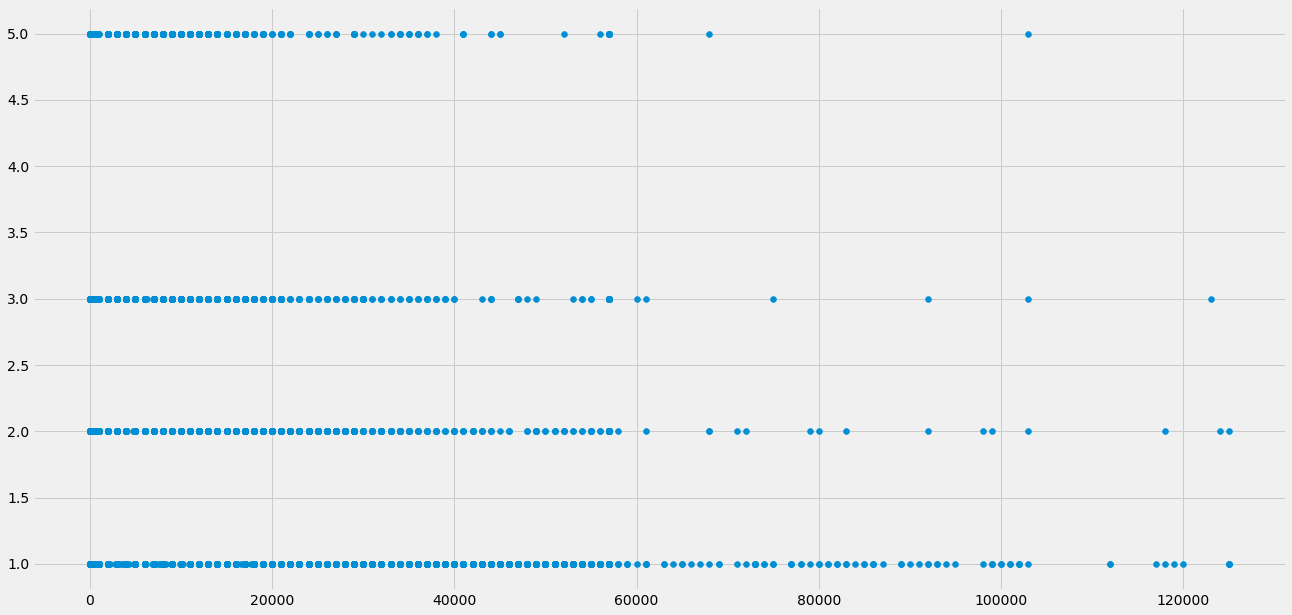

In [74]:
plt.scatter(x=fraud_inpat_bene_merged['InscClaimAmtReimbursed'], y=fraud_inpat_bene_merged['Race'])

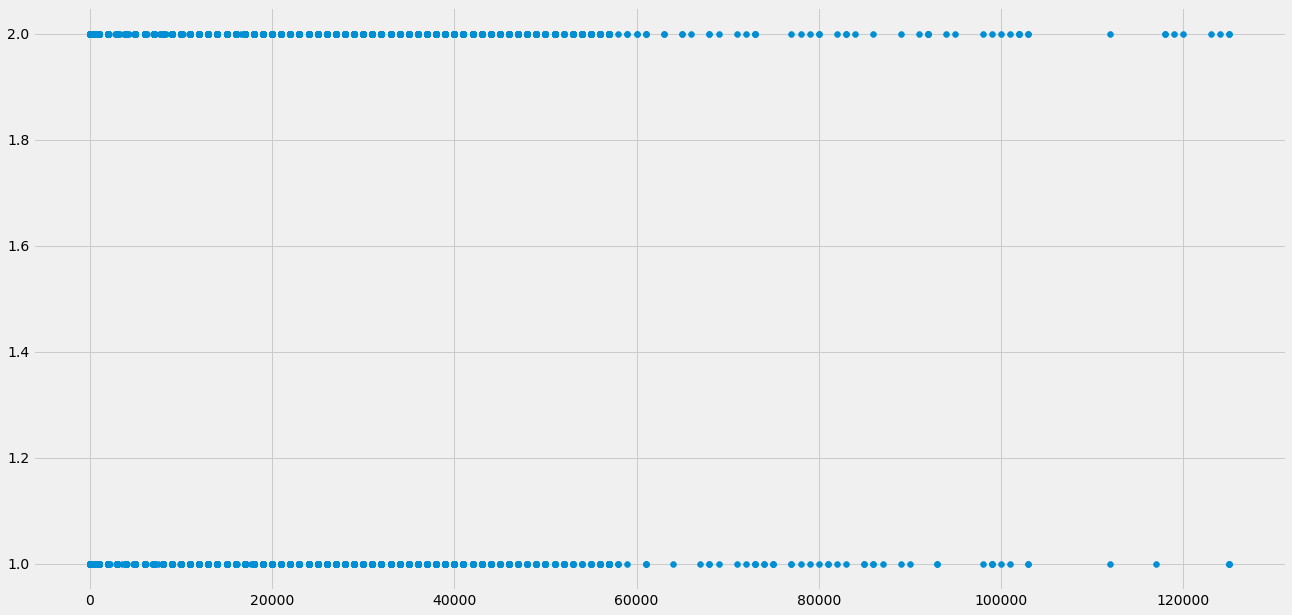

In [75]:
plt.scatter(x=fraud_inpat_bene_merged['InscClaimAmtReimbursed'], y=fraud_inpat_bene_merged['Gender'])

## Making DataFrames into CSVs

In [76]:
fraud_inpat_bene_merged.to_csv('clean_inpatient.csv')

In [77]:
fraud_outpat_bene_merged.to_csv('clean_outpatient.csv')

## Making New Dataframe using Masks

In [78]:
#Making a dataframe for Providers who were flagged as yes with columns of data I want to work with.

##  inpatient df

In [79]:
fraud_inpat_bene_merged.dtypes

Provider                                    object
PotentialFraud                              object
BeneID                                      object
ClaimID                                     object
ClaimStartDt                                object
ClaimEndDt                                  object
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
ClmDiagnosisCode_1                          object
DOB                                 datetime64[ns]
Gender                                       int64
Race                                         int64
RenalDiseaseIndicator                       object
State                                       object
County                                       int64
NoOfMonths_PartACov                          int64
NoOfMonths_PartBCov                          int64
ChronicCond_Alzheimer                        int64
ChronicCond_Heartfailure                     int64
ChronicCond_KidneyDisease      

In [80]:
fraud_yes_inpat = fraud_inpat_bene_merged[fraud_inpat_bene_merged['PotentialFraud']=='Yes'][['Provider','State','InscClaimAmtReimbursed','Age_in_Years',\
    'Gender_1','Gender_2','Race_1','Race_2','Race_3','Race_5']]

In [81]:
fraud_yes_inpat.head(5)

,Provider,State,InscClaimAmtReimbursed,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
2,PRV51067,Alabama,83000,82.513753,1,0,1,0,0,0
5,PRV51059,Alabama,11000,91.009479,0,1,1,0,0,0
6,PRV51067,Alabama,36000,91.009479,0,1,1,0,0,0
7,PRV51067,Alabama,54000,91.009479,0,1,1,0,0,0
9,PRV51059,Alabama,39000,107.176820,0,1,1,0,0,0


In [82]:
fraud_yes_inpat.shape

(23231, 10)

In [83]:
fraud_yes_inpat.describe()

,InscClaimAmtReimbursed,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
count,23231.000000,23231.000000,23231.000000,23231.000000,23231.000000,23231.000000,23231.000000,23231.000000
mean,10311.803624,85.060815,0.429383,0.570617,0.844131,0.104128,0.032500,0.019242
std,10659.374176,13.091837,0.494999,0.494999,0.362739,0.305433,0.177327,0.137376
min,0.000000,37.009739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4000.000000,79.009233,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,7000.000000,86.094936,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,12000.000000,93.928088,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,125000.000000,111.842213,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
fraud_yes_inpat['Gender_1'].value_counts(normalize=True)

0    0.570617
1    0.429383
Name: Gender_1, dtype: float64

In [85]:
fraud_yes_inpat['Gender_2'].value_counts(normalize=True)

1    0.570617
0    0.429383
Name: Gender_2, dtype: float64

In [86]:
fraud_yes_inpat['Race_1'].value_counts(normalize=True)

1    0.844131
0    0.155869
Name: Race_1, dtype: float64

## Outpatient DF

In [87]:
fraud_yes_outpat = fraud_outpat_bene_merged[fraud_outpat_bene_merged['PotentialFraud']=='Yes'][['Provider','State','InscClaimAmtReimbursed','Age_in_Years',\
    'Gender_1','Gender_2','Race_1','Race_2','Race_3','Race_5']]

In [88]:
fraud_yes_outpat.head()

,Provider,State,InscClaimAmtReimbursed,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
4,PRV54209,Alabama,20,90.513918,1,0,1,0,0,0
9,PRV54209,Alabama,300,87.261284,0,1,1,0,0,0
12,PRV51037,Alabama,20,84.679438,1,0,1,0,0,0
41,PRV51037,Alabama,200,109.096093,0,1,0,1,0,0
42,PRV51037,Alabama,60,109.096093,0,1,0,1,0,0


In [89]:
fraud_yes_outpat.describe()

,InscClaimAmtReimbursed,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
count,184235.000000,184235.000000,184235.000000,184235.000000,184235.000000,184235.000000,184235.000000,184235.000000
mean,288.952099,84.771954,0.420637,0.579363,0.838212,0.094499,0.043108,0.024181
std,784.406095,12.992741,0.493663,0.493663,0.368257,0.292522,0.203101,0.153611
min,0.000000,36.927602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,79.009233,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,80.000000,85.596637,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,200.000000,93.429789,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,102500.000000,111.842213,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
fraud_outpat_bene_merged.groupby(by='PotentialFraud')[['Gender_1', 'Gender_2','Race_1','Race_2','Race_3','Race_5',]].sum()

,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
PotentialFraud,,,,,,
No,133845.0,184005.0,269982.0,32601.0,9671.0,5596.0
Yes,77496.0,106739.0,154428.0,17410.0,7942.0,4455.0


In [91]:
fraud_yes_outpat['Gender_1'].value_counts(normalize=True)

0    0.579363
1    0.420637
Name: Gender_1, dtype: float64

In [92]:
fraud_yes_outpat['Race_1'].value_counts(normalize=True)

1    0.838212
0    0.161788
Name: Race_1, dtype: float64

##  Provider, Potential Fraud, and Claims related EDA

In [93]:
fraud_outpat_bene_merged[fraud_outpat_bene_merged.PotentialFraud == "Yes"].groupby(by=['ClmDiagnosisCode_1', 'PotentialFraud']).count().sort_values(by='Provider', ascending=False)

,,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
ClmDiagnosisCode_1,PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4019,Yes,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981
4011,Yes,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515,4515
2724,Yes,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334
2720,Yes,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128
2722,Yes,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90181,Yes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
90081,Yes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20001,Yes,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [94]:
fraud_inpat_bene_merged[fraud_inpat_bene_merged.PotentialFraud == "Yes"].groupby(by=['ClmDiagnosisCode_1', 'PotentialFraud','InscClaimAmtReimbursed']).count().sort_values(by='Provider', ascending=True)
#fraud_inpat_bene_merged[fraud_inpat_bene_merged.ClmDiagnosisCode_1 == "5679"]

Provider  BeneID  \
ClmDiagnosisCode_1 PotentialFraud InscClaimAmtReimbursed                     
496                Yes            7000                           1       1   
5679               Yes            12000                          1       1   
                                  9000                           1       1   
                                  5000                           1       1   
56789              Yes            12000                          1       1   
...                                                            ...     ...   
49121              Yes            6000                         107     107   
486                Yes            6000                         113     113   
                                  4000                         114     114   
5990               Yes            4000                         117     117   
486                Yes            5000                         152     152   

                                                          ClaimID  \
ClmDiagnosisCode_1 PotentialFraud InscClaimAmtReimbursed            
496                Yes            7000                          1   
5679               Yes            12000                         1   
                                  9000                          1   
                                  5000                          1   
56789              Yes            12000                         1   
...                                                           ...   
49121              Yes            6000                        107   
486                Yes            6000                        113   
                                  4000                        114   
5990               Yes            4000                        117   
486                Yes            5000                        152   

                                                          ClaimStartDt  \
ClmDiagnosisCode_1 PotentialFraud InscClaimAmtReimbursed                 
496                Yes            7000                               1   
5679               Yes            12000                              1   
                                  9000                               1   
                                  5000                               1   
56789              Yes            12000                              1   
...                                                                ...   
49121              Yes            6000                             107   
486                Yes            6000                             113   
                                  4000                             114   
5990               Yes            4000                             117   
486                Yes            5000                             152   

                                                          ClaimEndDt  \
ClmDiagnosisCode_1 PotentialFraud InscClaimAmtReimbursed               
496                Yes            7000                             1   
5679               Yes            12000                            1   
                                  9000                             1   
                                  5000                             1   
56789              Yes            12000                            1   
...                                                              ...   
49121              Yes            6000                           107   
486                Yes            6000                           113   
                                  4000                           114   
5990               Yes            4000                           117   
486                Yes            5000                           152   

                                                          AttendingPhysician  \
ClmDiagnosisCode_1 PotentialFraud InscClaimAmtReimbursed                       
496                Yes            7000                                     1   
5679 

In [95]:
#Power BI value check
fraud_outpat_bene_merged.groupby('PotentialFraud')['InscClaimAmtReimbursed'].sum()

PotentialFraud
No     91492640
Yes    53235090
Name: InscClaimAmtReimbursed, dtype: int64

In [96]:
#Power BI value check
fraud_inpat_bene_merged.groupby('PotentialFraud')['InscClaimAmtReimbursed'].sum()

PotentialFraud
No     164244210
Yes    239553510
Name: InscClaimAmtReimbursed, dtype: int64

In [97]:
fraud_outpat_bene_merged['ChronicCond_Alzheimer'].value_counts()

2    304075
1    198010
Name: ChronicCond_Alzheimer, dtype: int64

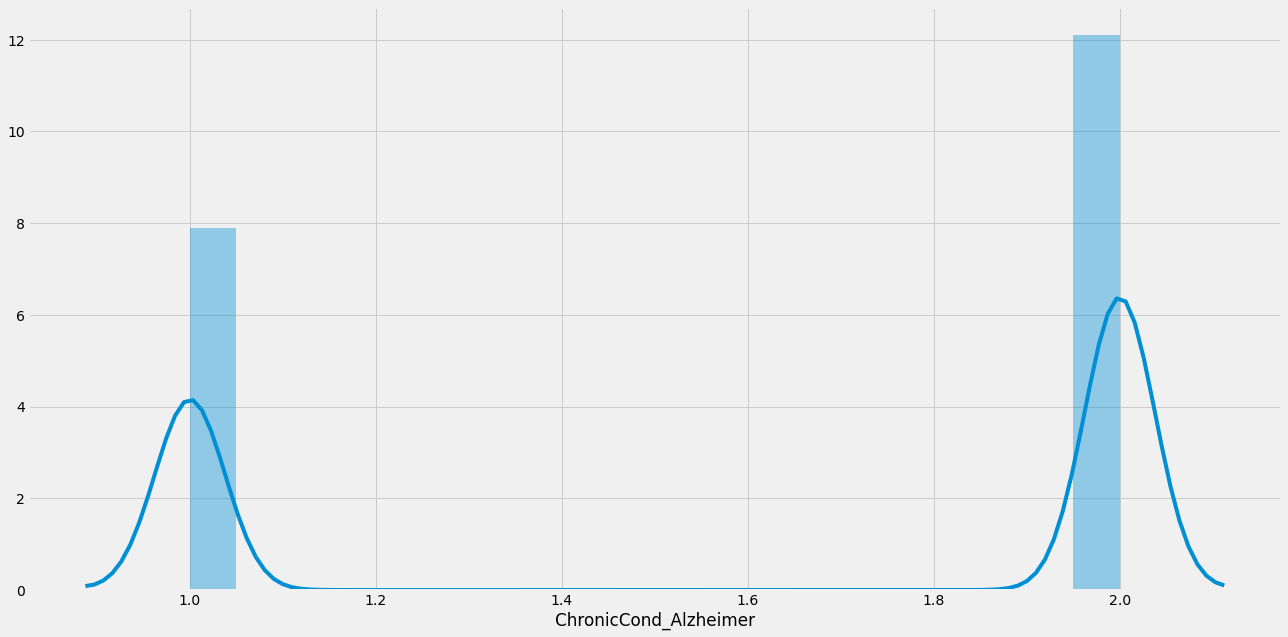

In [98]:
# Control the number of bins
sns.distplot( fraud_outpat_bene_merged['ChronicCond_Alzheimer'], bins=20 )
#sns.plt.show()
 

In [99]:
fraud_outpat_bene_merged['Gender'].value_counts()

2    290744
1    211341
Name: Gender, dtype: int64

In [100]:
fraud_outpat_bene_merged['PotentialFraud'].value_counts()

No     317850
Yes    184235
Name: PotentialFraud, dtype: int64

## Replacing values in Chronic Conditions


In [101]:
#Kaggle dataset author Rohit Anand Gupta assigned these values and noted in code notebook:
    ##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1


In [102]:
fraud_inpat_bene_merged.replace({'ChronicCond_Alzheimer':{2:0},'ChronicCond_Heartfailure':{2:0},'ChronicCond_KidneyDisease':{2:0},
                                 'ChronicCond_Cancer':{2:0},'ChronicCond_ObstrPulmonary':{2:0},
                                 'ChronicCond_Depression':{2:0},'ChronicCond_Diabetes':{2:0},
                                 'ChronicCond_IschemicHeart':{2:0},'ChronicCond_Osteoporasis':{2:0},
                                 'ChronicCond_rheumatoidarthritis':{2:0}, 'ChronicCond_stroke':{2:0}}, inplace=True)

In [103]:
fraud_outpat_bene_merged.replace({'ChronicCond_Alzheimer':{2:0}, 'ChronicCond_Heartfailure':{2:0},'ChronicCond_KidneyDisease':{2:0},
                                 'ChronicCond_Cancer':{2:0},'ChronicCond_ObstrPulmonary':{2:0},
                                 'ChronicCond_Depression':{2:0},'ChronicCond_Diabetes':{2:0},
                                 'ChronicCond_IschemicHeart':{2:0},'ChronicCond_Osteoporasis':{2:0},
                                 'ChronicCond_rheumatoidarthritis':{2:0}, 'ChronicCond_stroke':{2:0}}, inplace=True)

In [104]:
fraud_inpat_bene_merged

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,29650,1940-07-01,1,1,0,Alabama,510,12,12,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,29345 days 12:42:38.353356,80.345331,1,0,1,0,0,0
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,0388,1938-05-01,1,1,0,Alabama,160,12,12,0,0,1,0,0,0,0,0,0,0,0,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0,1,0,0,0
2,PRV51067,Yes,BENE38773,CLM44546,2009-03-29,2009-04-14,83000,PHY357958,57400,1938-05-01,1,1,0,Alabama,160,12,12,0,0,1,0,0,0,0,0,0,0,0,95000,2136,2270,900,30137 days 12:42:38.353356,82.513753,1,0,1,0,0,0
3,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,56211,1934-11-01,2,1,0,Alabama,510,12,12,1,1,0,0,0,1,1,1,0,1,0,3000,1068,0,0,31414 days 12:42:38.353356,86.010061,0,1,1,0,0,0
4,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,4241,1929-11-01,2,1,Y,Alabama,160,12,12,0,1,1,0,1,1,1,1,0,1,0,143800,4272,880,70,33240 days 12:42:38.353356,91.009479,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,PRV57757,No,BENE45548,CLM79809,2009-12-16,2009-12-20,4000,PHY390286,9916,1942-08-01,1,1,Y,Tennessee,940,12,12,0,1,1,0,1,1,1,1,0,1,0,4000,1068,6020,1270,28584 days 12:42:38.353356,78.261784,1,0,1,0,0,0
40470,PRV57757,No,BENE77790,CLM71984,2009-10-14,2009-10-18,13000,PHY390286,1890,1931-06-01,1,1,Y,Tennessee,940,12,12,0,1,1,0,0,1,1,1,0,1,0,13000,1068,670,120,32663 days 12:42:38.353356,89.429707,1,0,1,0,0,0
40471,PRV57757,No,BENE78520,CLM32029,2009-01-02,2009-01-05,3000,PHY390286,8020,1914-08-01,2,1,0,Tennessee,100,12,12,1,1,0,0,1,1,1,1,0,0,1,3000,1068,3890,710,38811 days 12:42:38.353356,106.262359,0,1,1,0,0,0
40472,PRV57757,No,BENE123698,CLM38965,2009-02-18,2009-02-21,14000,PHY390286,73313,1938-06-01,2,1,Y,Tennessee,940,12,12,0,0,1,1,0,1,1,1,0,1,0,14060,1068,2410,2200,30106 days 12:42:38.353356,82.428878,0,1,1,0,0,0


In [105]:
fraud_outpat_bene_merged

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,5953,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,4271,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,V669,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
4,PRV54209,Yes,BENE11727,CLM716625,2009-12-06,2009-12-06,20,PHY388079,42830,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
5,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,78650,1943-03-01,1,1,0,Alabama,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,28372 days 12:42:38.353356,77.681348,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517731,PRV57763,No,BENE107742,CLM372100,2009-05-21,2009-05-21,70,PHY321072,78703,1942-08-01,1,1,0,Maine,210,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,2670,1180,28584 days 12:42:38.353356,78.261784,1,0,1,0,0,0
517733,PRV57763,No,BENE142602,CLM349417,2009-05-09,2009-05-09,1900,PHY321072,4130,1937-10-01,2,1,0,Maine,210,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,2180,350,30349 days 12:42:38.353356,83.094190,0,1,1,0,0,0
517734,PRV57763,No,BENE142602,CLM537266,2009-08-21,2009-08-21,80,PHY321072,78650,1937-10-01,2,1,0,Maine,210,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,2180,350,30349 days 12:42:38.353356,83.094190,0,1,1,0,0,0
517735,PRV57763,No,BENE142602,CLM710306,2009-12-02,2009-12-02,200,PHY321072,46431,1937-10-01,2,1,0,Maine,210,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,2180,350,30349 days 12:42:38.353356,83.094190,0,1,1,0,0,0


In [106]:
fraud_outpat_bene_merged.groupby(by='PotentialFraud')['ChronicCond_Alzheimer'].count()
                                                      #(,'ChronicCond_Heartfailure','ChronicCond_KidneyDisease']].sum()
#'ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
                                                       #'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']].sum()

PotentialFraud
No     317850
Yes    184235
Name: ChronicCond_Alzheimer, dtype: int64

In [107]:
fraud_outpat_bene_merged.head(3)


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Age_in_Years,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,5953,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
2,PRV51026,No,BENE11727,CLM744562,2009-12-25,2009-12-25,50,PHY362964,4271,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0
3,PRV51063,No,BENE11727,CLM551301,2009-08-29,2009-08-29,10,PHY404855,V669,1930-05-01,1,1,Y,Alabama,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,33059 days 12:42:38.353356,90.513918,1,0,1,0,0,0


In [108]:
fraud_inpat_bene_merged.to_csv('clean_inpatient.csv')

In [109]:
fraud_outpat_bene_merged.to_csv('clean_outpaitent.csv')

In [110]:
conditions=['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
            'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
            'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

In [111]:
conditions

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

In [112]:



for x in conditions:
    print (fraud_outpat_bene_merged[fraud_outpat_bene_merged.PotentialFraud == 'Yes'].groupby(['PotentialFraud',x])['ClaimID'].count())


    #fraud_outpat_bene_merged.groupby(by='PotentialFraud')['ChronicCond_stroke'].count()

    


PotentialFraud  ChronicCond_Alzheimer
Yes             0                        111601
                1                         72634
Name: ClaimID, dtype: int64
PotentialFraud  ChronicCond_Heartfailure
Yes             0                            77234
                1                           107001
Name: ClaimID, dtype: int64
PotentialFraud  ChronicCond_KidneyDisease
Yes             0                            110440
                1                             73795
Name: ClaimID, dtype: int64
PotentialFraud  ChronicCond_Cancer
Yes             0                     156806
                1                      27429
Name: ClaimID, dtype: int64
PotentialFraud  ChronicCond_ObstrPulmonary
Yes             0                             128833
                1                              55402
Name: ClaimID, dtype: int64
PotentialFraud  ChronicCond_Depression
Yes             0                         105603
                1                          78632
Name: ClaimID, dtype: int6

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, **kwargs)>

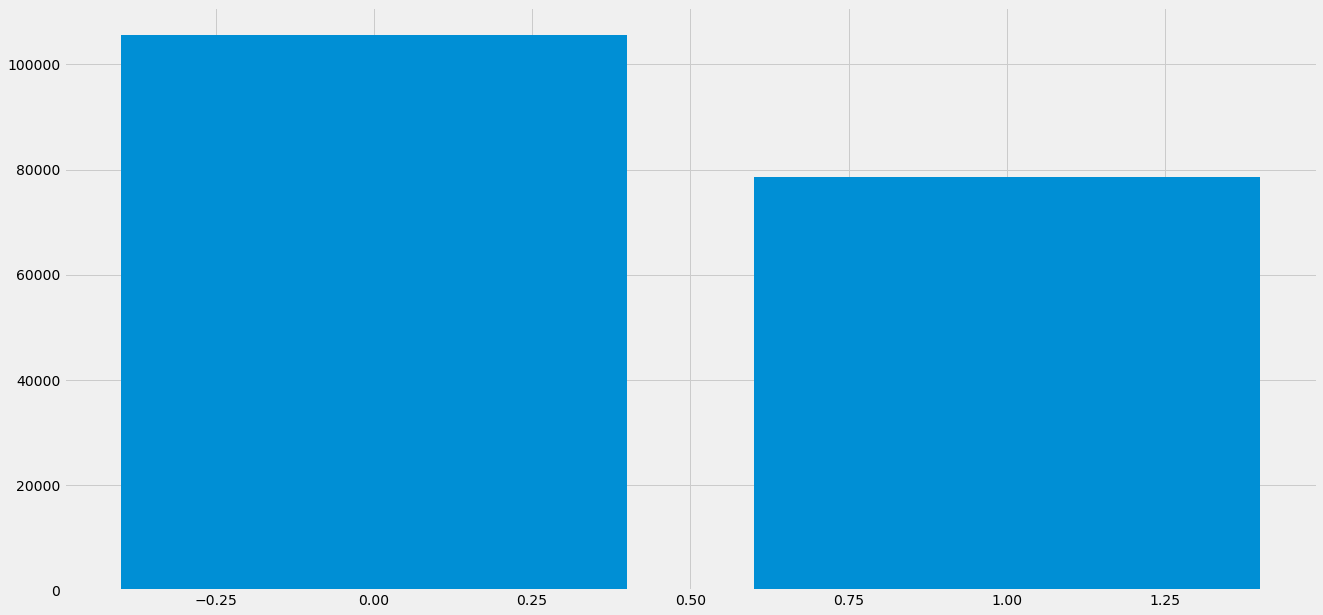

In [113]:
plt.bar(x=[0,1], height=[105603,78632])
plt.title
    
    

In [114]:
pd.crosstab(fraud_inpat_bene_merged['PotentialFraud'], fraud_inpat_bene_merged[])

SyntaxError: invalid syntax (<ipython-input-114-4941e1cd1324>, line 1)

In [ ]:

test=pd.DataFrame()
for x in conditions:
    test.add(fraud_outpat_bene_merged[fraud_outpat_bene_merged.PotentialFraud == 'Yes'].groupby(['PotentialFraud',x])['ClaimID'].count())
test


In [ ]:
type(test)

In [ ]:
fraud_outpat_bene_merged[fraud_outpat_bene_merged.ChronicCond_stroke == "YES"].groupby(by='PotentialFraud').count();
fraud_outpat_bene_merged[fraud_outpat_bene_merged.ChronicCond_Heartfailure == "YES"].groupby(by='PotentialFraud').count()
#fraud_outpat_bene_merged[fraud_outpat_bene_merged.ChronicCond_Alzheimer == "YES"].groupby(by='PotentialFraud').count()

In [ ]:
fraud_outpat_bene_merged.groupby(['PotentialFraud','ChronicCond_Alzheimer'])['ClaimID'].count()

In [ ]:
fraud_outpat_bene_merged.group['Race_1'].value_counts()